<a href="https://colab.research.google.com/github/bekambirhanu/CSEC_Data_science/blob/main/CSEC_Data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.

**List** -> a non-primitive data type that stores multiple data of the same type.
Examples:   [1, 2, 4, 5]
            ["apple", "mango"] etc
 **Dictionary** -> a non-primitive datatype that stores data in the form of key-value pair

 **NumPy array** -> is an array of the data of the same type. unlike list,
 numpy array ;-

*   uses fixed type (each index in array are of the same predefined dtype like: int32, float64 ...)
*   has a contiguous memory -> all indexs in the array are next to each other.

all the above  characteristics makes it different from list in terms of time efficiency(since it has a predefined dtype, there when it comes to iteration doesn't need to check for the datatype. meking it faster) and space efficiency





In [ ]:
#2.
import numpy as np

def transform(lst: list):

  arr = np.array(lst)

  condition = (arr%2 == 0)

  result = np.where(condition, arr**2, arr)
  return result


arr = [10, 15, 20, 25, 30]

print(transform(arr))

[100  15 400  25 900]


3.

the output is >> [1, 2, 3, 4]

inlike numpy, when y = x is executed, y references to x which references to the list [1, 2, 3]. since both x and y share the same list, modifying y by appending 4 in to it modifies x too.

but when using numpy, it does not modify an existing array. instead creates a new array

lets take an example:

In [ ]:
import numpy as np

x = np.array([1, 2, 3])
y = x
y = np.append(y,4)

print(x) # outputs [1, 2, 3]

[1 2 3]


4.

**shape** is an attribute in pandas DataFrame class that tells about the arrays` dimentions in form of tuple (column, row) while,

**describe()** is a method that tells about the data's statistics like mean, max, min, std(standard deviation), percentiles and count.

in the example below there is a data 'raw_data' that tells the the population of different animals found in 3 different districts (d0, d1, d2)

In [ ]:
import pandas as pd

raw_data = {'cat': [2, 4, 5], 'dog': [7, 10, 1], 'rabbits': [8, 3, 9]}


data = pd.DataFrame(raw_data)

print(data.shape)
print()
print(data.describe())

(3, 3)

            cat        dog   rabbits
count  3.000000   3.000000  3.000000
mean   3.666667   6.000000  6.666667
std    1.527525   4.582576  3.214550
min    2.000000   1.000000  3.000000
25%    3.000000   4.000000  5.500000
50%    4.000000   7.000000  8.000000
75%    4.500000   8.500000  8.500000
max    5.000000  10.000000  9.000000


5.

**Month** | **"1958"** | **"1959"** | **"1960"**
--------|--------|--------|--------|
JAN | 340 | 360 | 417 |
--------|--------|--------|--------|
FEB | 318 | 342 | 391 |
--------|--------|--------|--------|
MAR | 362 | 406 | 419 |
--------|--------|--------|--------|
APR | 348 | 396 | 461 |
--------|--------|--------|--------|
MAY | 363 | 420 | 472 |

Things i noticed about this data are:

*    the data shows an inconsistent increasing rate of growth of number of air travel month over month and year over year

*    the lowest number of air travel is 318 in FEB 1958 and the higest is 472 in MAY 1960

*    it increases in those three consecutive years of the same month.
for example, in the first month of the 3 years the number of air travel increases as the year goes by

*    most of the highest number of air travels registered in those consecutive years are in the later months rather than the earliests. this implies that the number of air travel also increases in each year as the month goes by eventhough it is not consistently increasing

*    the rate of growth also increases in most of the month year to year

6.

* The month with the highest total passengers registered is JULY in 1960 having 622 flights as the CSV shows

* The month with the lowest total passengers in the year 1958 is NOVEMBER having 310 flights as the CSV shows

7.

The **.groupby()** method uses to group large amounts of data based on a given criterias and computes operations on those groups.
this method works by spliting the object, applying a function and combining the result.

**parameters**

by - it determines the groups for the object. It can be a function (the function is called in each value of the object), a dict,a list or ndarray.

axis - it splits the group along rows or columns(delfault to 0)

level - to groupby the object by a particular levels. it can be an int or asequence of level names

as_index - returns object with group labels as the index. (default to True)

sort - sorts the gruops` keys. if False, it appears in the same order as the original object. (defaults to True)

group_keys - it controls whether to include the group keys in the result when using methods like apply(), transform(), or filter(). (defaults to True)

dropna - if group keys contain NA values, the NA values with the row or column will be dropped. if False, NA values will be treated as keys. (defaults to True)

observed - if True, only show observed values for categorical groupers. (defaults to False)

lets demonstrate this by an example using a dummy data about different house pet speed.

In [ ]:
import pandas as pd

data = {'Pet': ['dog', 'dog', 'cat', 'cat', 'rabbit', 'rabbit', 'hamster', 'hamster'],
        'Max-speed(kph)': [72, 25, 48, 30, 55, 20, 10, 8],
        'Legs': [4, 4, 4, 4, 4, 4, 4, 4]}

df = pd.DataFrame(data)

print(df)
print()
# to find the average maximum speed for each pet of the same breed

df_max_speed = df.groupby(by='Pet')['Max-speed(kph)'].mean()

print(df_max_speed)



       Pet  Max-speed(kph)  Legs
0      dog              72     4
1      dog              25     4
2      cat              48     4
3      cat              30     4
4   rabbit              55     4
5   rabbit              20     4
6  hamster              10     4
7  hamster               8     4

Pet
cat        39.0
dog        48.5
hamster     9.0
rabbit     37.5
Name: Max-speed(kph), dtype: float64


In [ ]:
# transpose the DataFrame to demonstrate column grouping using axis param

df_transposed = df.set_index('Pet').T

print(df_transposed)
print()

result = df_transposed.groupby(by=df_transposed.columns, axis=1).sum()
print(result)

Pet             dog  dog  cat  cat  rabbit  rabbit  hamster  hamster
Max-speed(kph)   72   25   48   30      55      20       10        8
Legs              4    4    4    4       4       4        4        4

Pet             cat  dog  hamster  rabbit
Max-speed(kph)   78   97       18      75
Legs              8    8        8       8


<ipython-input-16-65f02f80a93e>:8: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  result = df_transposed.groupby(by=df_transposed.columns, axis=1).sum()


In [ ]:
# to convert 'Pet' to categorical with unused categories
data = {
    'Pet': pd.Categorical(['Dog', 'Dog', 'Cat', 'Cat', 'Rabbit', 'Rabbit', 'Hamster', 'Hamster'],
                         categories=['Dog', 'Cat', 'Rabbit', 'Hamster', 'Horse']),
    'Max_Speed_kmh': [72, 25, 48, 30, 55, 20, 10, 8],
    'Legs': [4, 4, 4, 4, 4, 4, 4, 4]
}
df = pd.DataFrame(data)
print(df)
print()
# Demonstrate observed=False (default) vs observed=True

print("Categories with observed=False (default):", df['Pet'].cat.categories)
#Includes all categories, even empty ones

all_categ = df.groupby('Pet', observed=False).sum()
print(all_categ)
print()
# to only include the observed categories

grouped = df.groupby('Pet', observed=True).sum()

print(grouped)

       Pet  Max_Speed_kmh  Legs
0      Dog             72     4
1      Dog             25     4
2      Cat             48     4
3      Cat             30     4
4   Rabbit             55     4
5   Rabbit             20     4
6  Hamster             10     4
7  Hamster              8     4

Categories with observed=False (default): Index(['Dog', 'Cat', 'Rabbit', 'Hamster', 'Horse'], dtype='object')
         Max_Speed_kmh  Legs
Pet                         
Dog                 97     8
Cat                 78     8
Rabbit              75     8
Hamster             18     8
Horse                0     0

         Max_Speed_kmh  Legs
Pet                         
Dog                 97     8
Cat                 78     8
Rabbit              75     8
Hamster             18     8


In [ ]:
#8.
import seaborn as sns

#Load the Titanic dataset
df = sns.load_dataset('titanic')

# find null values in each column

null_values = df.isnull().sum()
#count them
total = len(null_values)

print('Missing values in each colun:')
print(null_values)
print()
print('in total: ',total)

Missing values in each colun:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

in total:  15


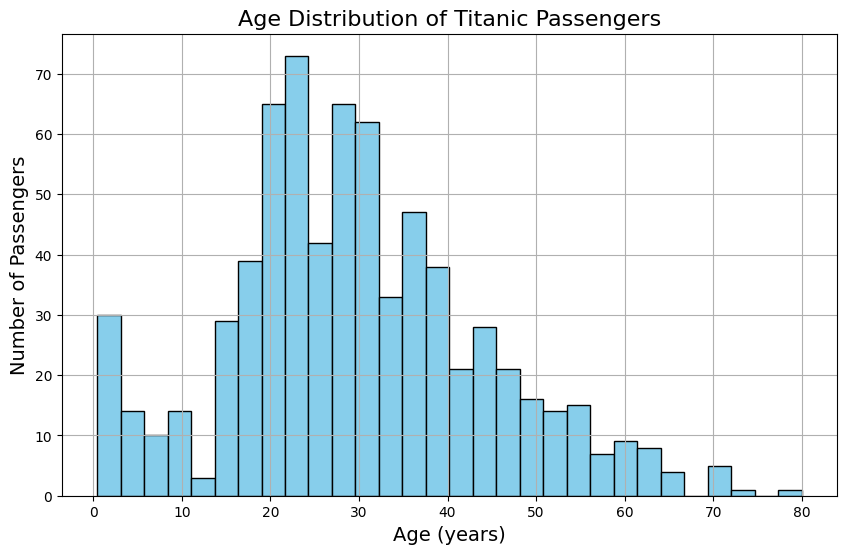

In [ ]:
#9.
# to visualize the age distribution we need to import matplotlib first

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['age'].hist(bins=30, color='skyblue', edgecolor='black')

# to add labels and title

plt.title('Age Distribution of Titanic Passengers', fontsize=16)
plt.xlabel('Age (years)', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)

plt.show()


Shapes observed:

* The "tail" of the distribution extends further to the right (toward older ages)
implies passengers were mostly in younger ages (20-35) -> right-skewed
* the highest peak appears arround 20 to 30 years old

the right-skew implies:

* the mass population was young adults

this is for the probable reason of
* parents traveling with children
* young adults seeking for job opportunities

* the 'tail' of the distribution implies of older passengers fewer in number.

these older passengers were likely to be wealthy families because of the affordability of the ticket cost is hard to save money for older people with dependent

10.

standard Deviation is a statistical operation that analyses how much the given data is spread out around the average(mean) taking the context of titanic dataset for example:
* lower standard deviation - most ages are close to the mean(average)
* higher standard deviation - ages are widely dispersed/ are far away from average(mean)

1. **Autonomus vehicles**

camera sensors failing to label rare or unusual edge cases because of missing data
for example teslas` autopilot may struggle with obscured road signs if training data lacks weather examples

2. **surveying on customer services**

due to the obvious fact that the happily satisfied customers are less likely to fill out surveys and unhappyly customers are more likely to fill out surveys, the data will be skewed toward the negative feedback making the service seem bad at the surveys because of the lack of diverse data.
